In [650]:
import sys
from pymodulon.io import *
from pymodulon.plotting import *
from os import path
from pymodulon.enrichment import *

In [651]:
from matplotlib_venn import venn2, venn3
from venn import venn

In [723]:
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rc('font', family='sans-serif', size=16)
plt.rc('text', usetex=False)
plt.rc('font', serif='Arial')
plt.rcParams['axes.axisbelow'] = True

In [653]:
data_dir = path.join('..','data','processed_data')
ica_data = load_json_model(path.join(data_dir,'ica_wip.json.gz'))

# Figure 1

## Figure 1a

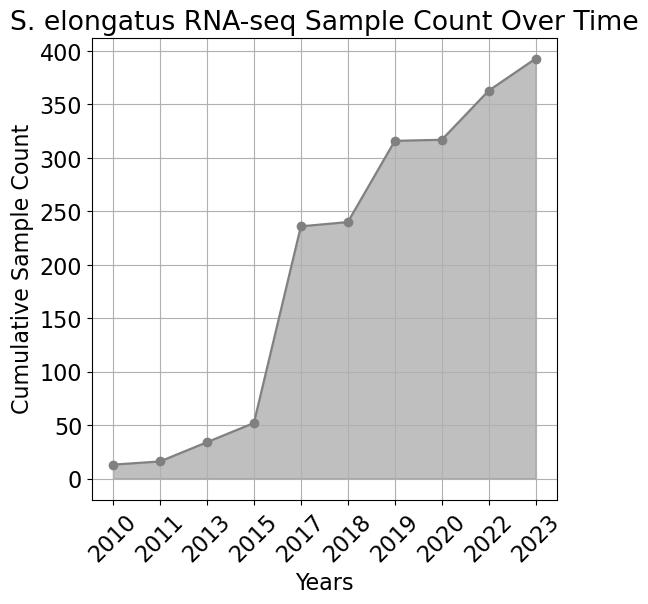

In [676]:
# Plotting the line chart
plt.figure(figsize=(6, 6))
plt.plot(sample_count['Date'], sample_count['CumulativeSampleCount'], marker='o', color='gray')
plt.title('S. elongatus RNA-seq Sample Count Over Time')
plt.fill_between(sample_count['Date'], sample_count['CumulativeSampleCount'], color='grey', alpha=0.5)
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.ylabel('Cumulative Sample Count')
plt.grid(True)
# plt.show()
# plt.savefig('../data/Figures/F1a.pdf',bbox_inches='tight',transparent=True)

## Figure 1b

In [672]:
metadata_raw = pd.read_csv('../metadata_combined.tsv',sep='\t')

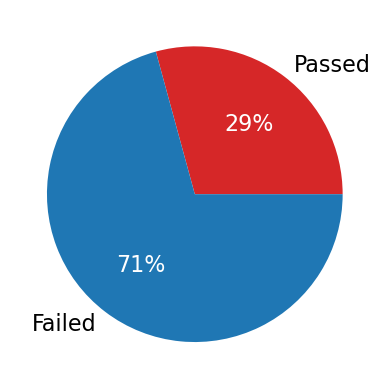

In [675]:
_,_,pcts = plt.pie([(metadata_raw.shape[0]-ica_data.sample_table.shape[0]),ica_data.sample_table.shape[0]],
                   labels = ['Failed','Passed'],
                   colors=['tab:red','tab:blue'],
                   autopct='%.0f%%',
                   textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')
    
# plt.savefig('../data/Figures/F1b.pdf',bbox_inches='tight',transparent=True)

## Figure 1d

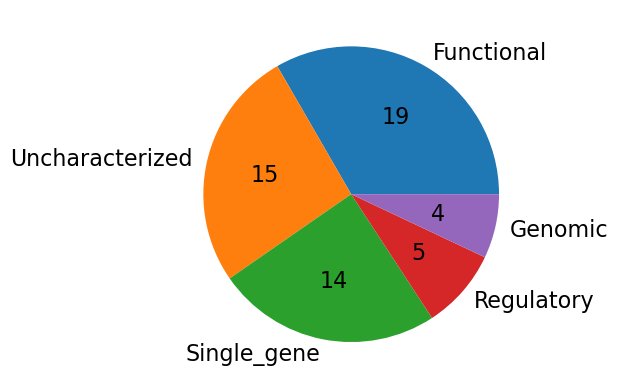

In [699]:
type_counts = ica_data.imodulon_table['type'].value_counts()
plt.pie(type_counts.values, labels=type_counts.index,
        autopct=lambda p: '{:.0f}'.format(p * sum(type_counts.values) / 100))
None
# plt.savefig('../data/Figures/F1d.pdf',bbox_inches='tight',transparent=True)

## Figure 1e

In [102]:
ica_data.imodulon_table.sort_values(by='explained_variance', ascending=True)[-15:][['type','category']]

,type,category
CysR,Functional,Metabolism
unchar_2,Uncharacterized,Uncharacterized
NtcA-1,Regulatory,Metabolism
Biofilm-2,Genomic,Lifestyle
UV,Functional,Stress
NtcA-2,Regulatory,Metabolism
Cytc_oxidases,Functional,Energy
unchar_11,Uncharacterized,Uncharacterized
ccm-2,Regulatory,Transport
HSR,Functional,Stress


Text(0, 0.5, 'iModulons')

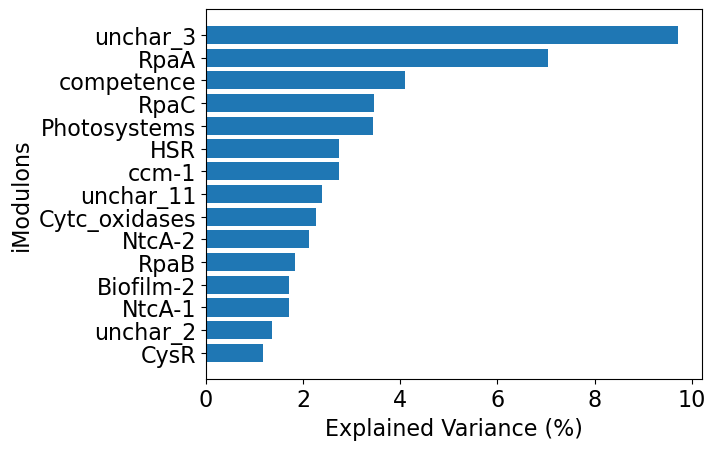

In [700]:
plt.barh(y = [str(x) for x in ica_data.imodulon_table.sort_values(by='explained_variance', ascending=True).index[-15:]],
        width=ica_data.imodulon_table.sort_values(by='explained_variance', ascending=True).explained_variance[-15:]*100)
plt.xlabel('Explained Variance (%)')
plt.ylabel('iModulons')
# plt.savefig('../data/Figures/F1e.pdf',bbox_inches ='tight',transparent=True)

## Figure 1f

In [704]:
import plotly.express as px
fig = px.treemap(ica_data.imodulon_table.reset_index(),
                path = ['category','index'],
                values='explained_variance')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_traces(marker=dict(cornerradius=5))
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()
# fig.write_image('../data/Figures/F1f.pdf',bbox_inches ='tight',transparent=True)

# Figure 2

## Figure 2a

In [106]:
# From PMC3935230
# Can also be found in the updated TRN file
rpaa_regulon = ["Synpcc7942_0004", "Synpcc7942_0012", "Synpcc7942_0013", "Synpcc7942_0017", "Synpcc7942_0018", "Synpcc7942_0065", "Synpcc7942_0095", "Synpcc7942_0100", "Synpcc7942_0101", "Synpcc7942_0102", "Synpcc7942_0156", "Synpcc7942_0157", "Synpcc7942_0170", "Synpcc7942_0171", "Synpcc7942_0172", "Synpcc7942_0243", "Synpcc7942_0244", "Synpcc7942_0245", "Synpcc7942_0314", "Synpcc7942_0315", "Synpcc7942_0316", "Synpcc7942_0342", "Synpcc7942_0369", "Synpcc7942_0370", "Synpcc7942_0371", "Synpcc7942_0394", "Synpcc7942_0433", "Synpcc7942_0434", "Synpcc7942_0457", "Synpcc7942_0462", "Synpcc7942_0463", "Synpcc7942_0464", "Synpcc7942_0465", "Synpcc7942_0466", "Synpcc7942_0467", "Synpcc7942_0468", "Synpcc7942_0469", "Synpcc7942_0482", "Synpcc7942_0483", "Synpcc7942_0556", "Synpcc7942_0557", "Synpcc7942_0558", "Synpcc7942_0570", "Synpcc7942_0571", "Synpcc7942_0572", "Synpcc7942_0657", "Synpcc7942_0797", "Synpcc7942_0834", "Synpcc7942_0846", "Synpcc7942_0847", "Synpcc7942_0891", "Synpcc7942_0905", "Synpcc7942_0906", "Synpcc7942_1150", "Synpcc7942_1156", "Synpcc7942_1157", "Synpcc7942_1164", "Synpcc7942_1216", "Synpcc7942_1217", "Synpcc7942_1313", "Synpcc7942_1327", "Synpcc7942_1328", "Synpcc7942_1336", "Synpcc7942_1337", "Synpcc7942_1393", "Synpcc7942_1475", "Synpcc7942_1505", "Synpcc7942_1506", "Synpcc7942_1548", "Synpcc7942_1552", "Synpcc7942_1553", "Synpcc7942_1557", "Synpcc7942_1572", "Synpcc7942_1573", "Synpcc7942_1574", "Synpcc7942_1575", "Synpcc7942_1586", "Synpcc7942_1610", "Synpcc7942_1611", "Synpcc7942_1612", "Synpcc7942_1621", "Synpcc7942_1622", "Synpcc7942_1646", "Synpcc7942_1647", "Synpcc7942_1656", "Synpcc7942_1661", "Synpcc7942_1740", "Synpcc7942_1741", "Synpcc7942_1742", "Synpcc7942_1745", "Synpcc7942_1746", "Synpcc7942_1753", "Synpcc7942_1754", "Synpcc7942_1755", "Synpcc7942_1756", "Synpcc7942_1757", "Synpcc7942_1784", "Synpcc7942_1802", "Synpcc7942_1803", "Synpcc7942_1804", "Synpcc7942_1833", "Synpcc7942_1834", "Synpcc7942_1835", "Synpcc7942_1849", "Synpcc7942_1914", "Synpcc7942_1949", "Synpcc7942_1950", "Synpcc7942_1951", "Synpcc7942_1960", "Synpcc7942_1974", "Synpcc7942_1975", "Synpcc7942_1976", "Synpcc7942_1987", "Synpcc7942_1999", "Synpcc7942_2058", "Synpcc7942_2059", "Synpcc7942_2113", "Synpcc7942_2114", "Synpcc7942_2116", "Synpcc7942_2117", "Synpcc7942_2118", "Synpcc7942_2119", "Synpcc7942_2120", "Synpcc7942_2121", "Synpcc7942_2185", "Synpcc7942_2248", "Synpcc7942_2254", "Synpcc7942_2266", "Synpcc7942_2267", "Synpcc7942_2279", "Synpcc7942_2306", "Synpcc7942_2307", "Synpcc7942_2308", "Synpcc7942_2326", "Synpcc7942_2333", "Synpcc7942_2334", "Synpcc7942_2335", "Synpcc7942_2336", "Synpcc7942_2378", "Synpcc7942_2379", "Synpcc7942_2387", "Synpcc7942_2388", "Synpcc7942_2394", "Synpcc7942_2395", "Synpcc7942_2460", "Synpcc7942_2473", "Synpcc7942_2474", "Synpcc7942_2475", "Synpcc7942_2487", "Synpcc7942_2488", "Synpcc7942_2522", "Synpcc7942_2523", "Synpcc7942_2524", "Synpcc7942_2525", "Synpcc7942_2526", "Synpcc7942_2527", "Synpcc7942_2552", "Synpcc7942_2553", "Synpcc7942_2554", "Synpcc7942_2555", "Synpcc7942_2556", "Synpcc7942_2557", "Synpcc7942_2590", "Synpcc7942_2591", "Synpcc7942_2596", "Synpcc7942_2597", "Synpcc7942_2605", "Synpcc7942_R0032", "Synpcc7942_R0002", "Synpcc7942_R0024"]

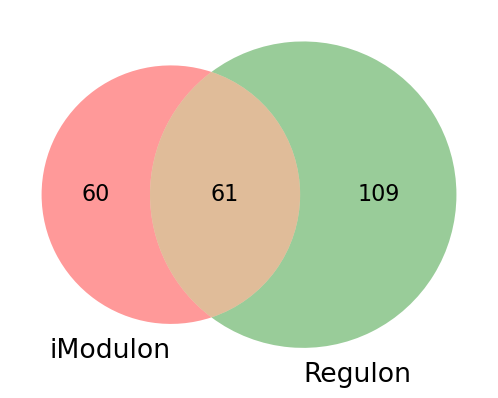

In [705]:
venn2([set(ica_data.view_imodulon('RpaA').index),set(rpaa_regulon)],
     set_labels=('iModulon','Regulon'))
# plt.savefig('../data/Figures/F2a.pdf',bbox_inches ='tight',transparent=True)

## Figure 2b

In [ ]:
def CD_activity(ica_data,imod_list):
    A = ica_data.A
#     ctrl = ['SRX3211320','SRX3211321']
    _2h = ['SRX3211322','SRX3211323']
    _4h = ['SRX3211324','SRX3211325']
    _6h = ['SRX3211326','SRX3211327']
    _8h = ['SRX3211328','SRX3211329']
    _9h = ['SRX3211330','SRX3211331']
    _10h = ['SRX3211332','SRX3211333']
    _12h = ['SRX3211334','SRX3211335']
    
    activity_array = []
    for imod in imod_list:
#         a1 = (A.loc[imod][ctrl[0]] + A.loc[imod][ctrl[1]]) / 2
        a2 = (A.loc[imod][_2h[0]] + A.loc[imod][_2h[1]]) / 2
        a3 = (A.loc[imod][_4h[0]] + A.loc[imod][_4h[1]]) / 2
        a4 = (A.loc[imod][_6h[0]] + A.loc[imod][_6h[1]]) / 2
        a5 = (A.loc[imod][_8h[0]] + A.loc[imod][_8h[1]]) / 2
        a6 = (A.loc[imod][_9h[0]] + A.loc[imod][_9h[1]]) / 2
        a7 = (A.loc[imod][_10h[0]] + A.loc[imod][_10h[1]]) / 2
        a8 = (A.loc[imod][_12h[0]] + A.loc[imod][_12h[1]]) / 2

        activity_array.append([a2,a3,a4,a5,a6,a7,a8])
    activity_df = pd.DataFrame(activity_array,index=imod_list,columns = ['CD_2h','CD_4h','CD_6h',
                                                                            'CD_8h','CD_9h','CD_10h','CD_12h'])
    return activity_df

In [ ]:
def LL_activity(ica_data,imod_list):
    A = ica_data.A
#     ctrl = ["SRX3211304", "SRX3211305"]
    _2h = ["SRX3211306", "SRX3211307"]
    _4h = ["SRX3211308", "SRX3211309"]
    _6h = ["SRX3211310", "SRX3211311"]
    _8h = ["SRX3211312", "SRX3211313"]
    _9h = ["SRX3211314", "SRX3211315"]
    _10h = ["SRX3211316", "SRX3211317"]
    _12h = ["SRX3211318", "SRX3211319"]
    
    activity_array = []
    for imod in imod_list:
#         a1 = (A.loc[imod][ctrl[0]] + A.loc[imod][ctrl[1]]) / 2
        a2 = (A.loc[imod][_2h[0]] + A.loc[imod][_2h[1]]) / 2
        a3 = (A.loc[imod][_4h[0]] + A.loc[imod][_4h[1]]) / 2
        a4 = (A.loc[imod][_6h[0]] + A.loc[imod][_6h[1]]) / 2
        a5 = (A.loc[imod][_8h[0]] + A.loc[imod][_8h[1]]) / 2
        a6 = (A.loc[imod][_9h[0]] + A.loc[imod][_9h[1]]) / 2
        a7 = (A.loc[imod][_10h[0]] + A.loc[imod][_10h[1]]) / 2
        a8 = (A.loc[imod][_12h[0]] + A.loc[imod][_12h[1]]) / 2

        activity_array.append([a2,a3,a4,a5,a6,a7,a8])
    activity_df = pd.DataFrame(activity_array,index=imod_list,columns = ['LL_2h','LL_4h','LL_6h',
                                                                            'LL_8h','LL_9h','LL_10h','LL_12h'])
    return activity_df

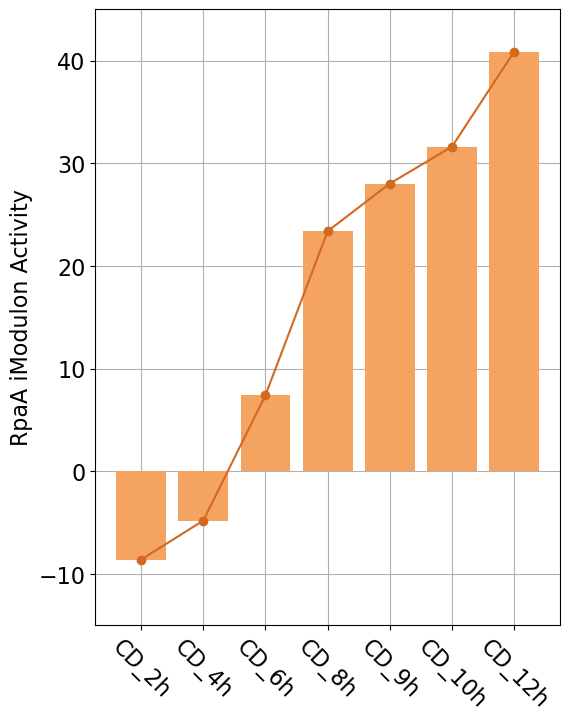

In [724]:
plt.figure(figsize=(6,8))
plt.bar(CD_activity(ica_data,['RpaA']).T.index,height=CD_activity(ica_data,['RpaA']).loc['RpaA'],
       color='sandybrown')
plt.plot(CD_activity(ica_data,['RpaA']).T,'-o',color='chocolate')
plt.xticks(rotation=-45)
plt.ylabel('RpaA iModulon Activity')
plt.ylim([-15,45])
plt.grid(True)
# plt.savefig('../data/Figures/F2b_1.pdf',bbox_inches='tight',transparent=True)
None

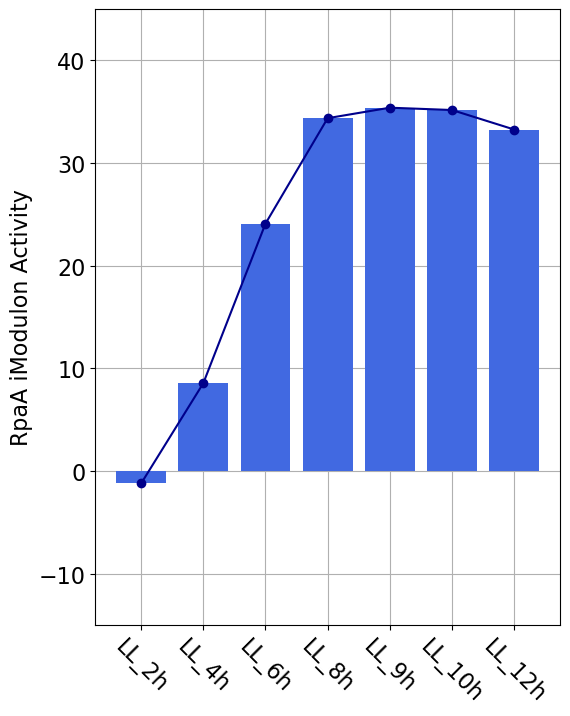

In [731]:
plt.figure(figsize=(6,8))
plt.bar(LL_activity(ica_data,['RpaA']).T.index,height=LL_activity(ica_data,['RpaA']).loc['RpaA'],
       color='royalblue')
plt.plot(LL_activity(ica_data,['RpaA']).T,'-o',color='darkblue')
plt.xticks(rotation=-45)
plt.ylabel('RpaA iModulon Activity')
plt.ylim([-15,45])
plt.grid(True)
# plt.savefig('../data/Figures/F2b_1.pdf',bbox_inches='tight',transparent=True)
None

## Figure 2c

<AxesSubplot:>

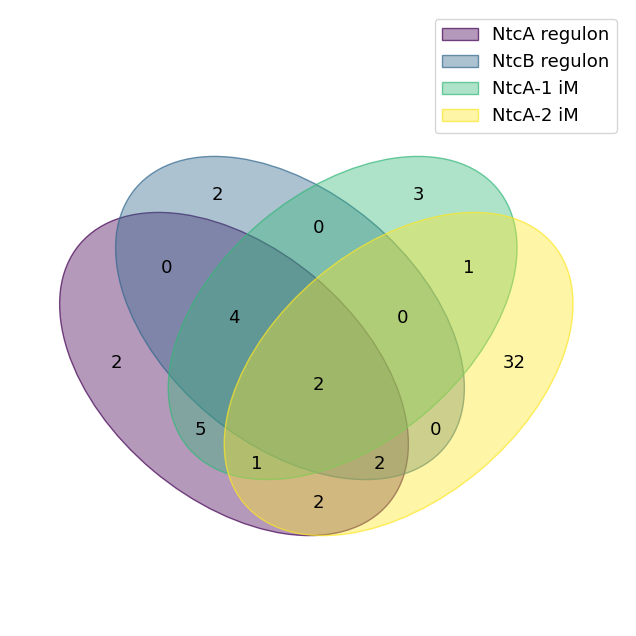

In [706]:
venn({'NtcA regulon':set(ica_data.trn[ica_data.trn.regulator=='ntcA'].gene_id),
      'NtcB regulon':set(ica_data.trn[ica_data.trn.regulator=='ntcB'].gene_id),
      'NtcA-1 iM':set(ica_data.view_imodulon('NtcA-1').index),
      'NtcA-2 iM':set(ica_data.view_imodulon('NtcA-2').index)})
# plt.savefig('../data/Figures/F2c.pdf',bbox_inches ='tight',transparent=True)

# Figure 4

## Figure 4a

<AxesSubplot:xlabel='Gene Start', ylabel='CysR Gene Weight'>

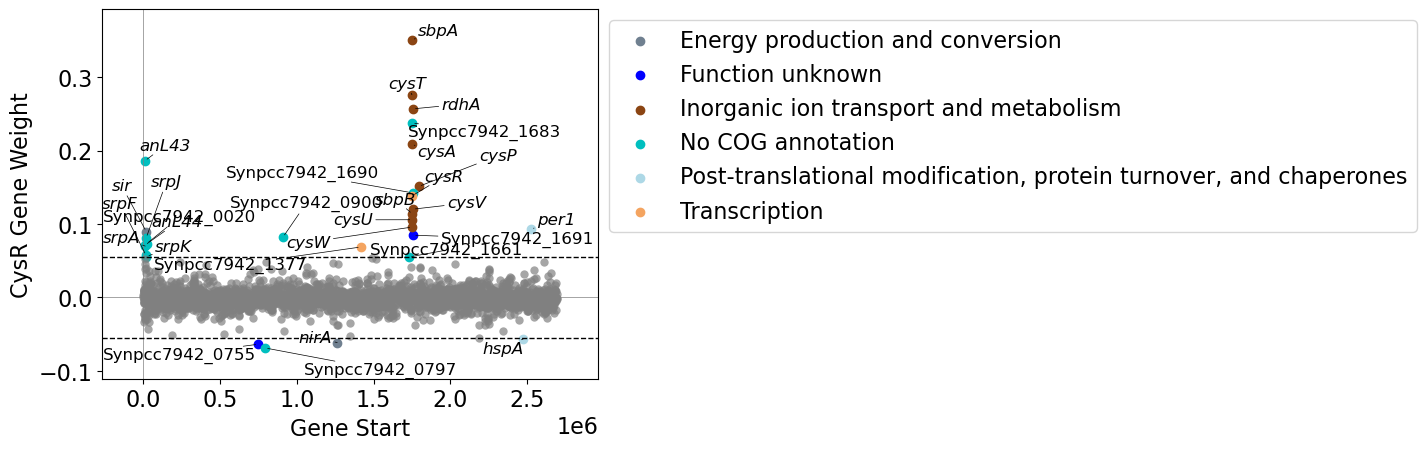

In [733]:
plot_gene_weights(ica_data,'CysR',show_labels=True)
# plt.savefig('../data/Figures/F4a.pdf',bbox_inches='tight',transparent=True)

## Figure 4b

<AxesSubplot:ylabel='RpaB iModulon\nActivity'>

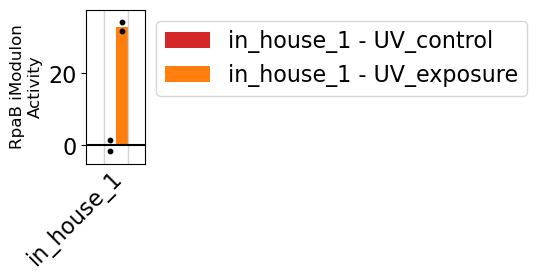

In [732]:
plot_activities(ica_data,'RpaB',projects='in_house_1')
# plt.savefig('../data/Figures/F4b.pdf',bbox_inches='tight',transparent=True)

## Figure 4c

<AxesSubplot:ylabel='RpaB iModulon\nActivity'>

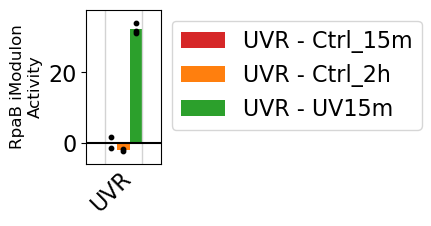

In [734]:
plot_activities(ica_data,'RpaB',projects='UVR')
# plt.savefig('../data/Figures/F4c.pdf',bbox_inches='tight',transparent=True)

## Figure 4d

In [735]:
rpab_chip = pd.read_excel('/home/annie/Downloads/elife-32032-fig5-data2.xlsx',sheet_name='Replicate 1',skiprows=4)
rpab_chip = rpab_chip[~rpab_chip['Gene target of peak'].isna()]

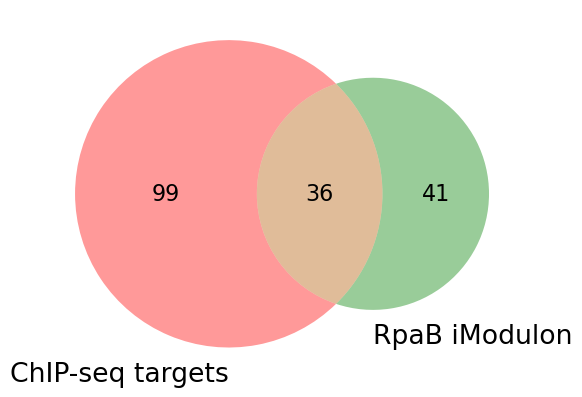

In [736]:
venn2([set(rpab_chip['Gene target of peak']),set(ica_data.view_imodulon('RpaB').index)],
     set_labels=['ChIP-seq targets','RpaB iModulon'])
# plt.savefig('../data/Figures/F4d.pdf',bbox_inches='tight',transparent=True)

## Figure 4e

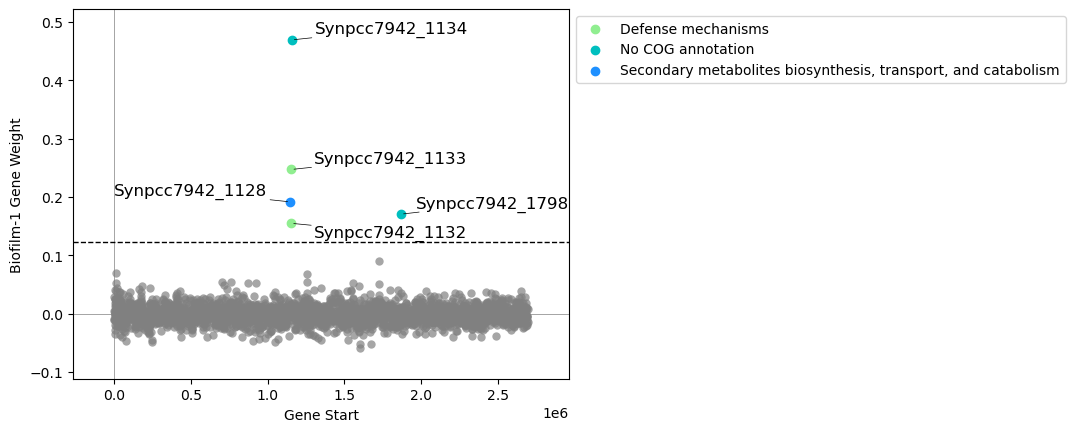

In [153]:
plot_gene_weights(ica_data,'Biofilm-1')
# plt.savefig('../data/Figures/F4e.pdf',bbox_inches='tight',transparent=True)

## Figure 4f

<AxesSubplot:ylabel='Biofilm-1 iModulon\nActivity'>

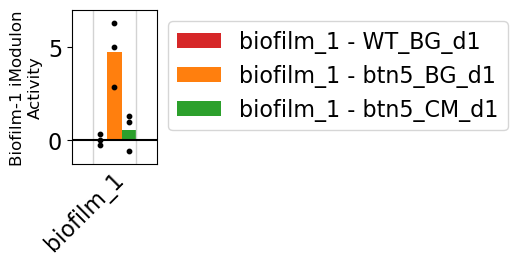

In [738]:
plot_activities(ica_data,'Biofilm-1',projects='biofilm_1')
# plt.savefig('../data/Figures/F4f.pdf',bbox_inches='tight',transparent=True)

## Figure 4g

<AxesSubplot:ylabel='Biofilm-1 iModulon\nActivity'>

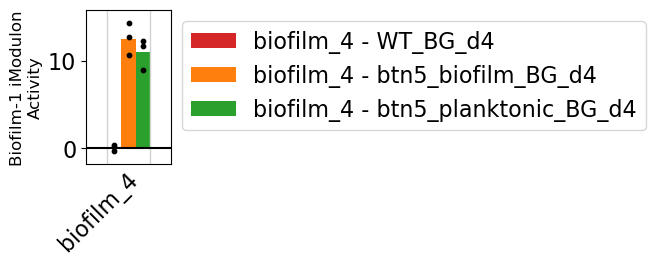

In [739]:
plot_activities(ica_data,'Biofilm-1',projects='biofilm_4')
# plt.savefig('../data/Figures/F4g.pdf',bbox_inches='tight',transparent=True)

# Figure 5

## Figure 5a

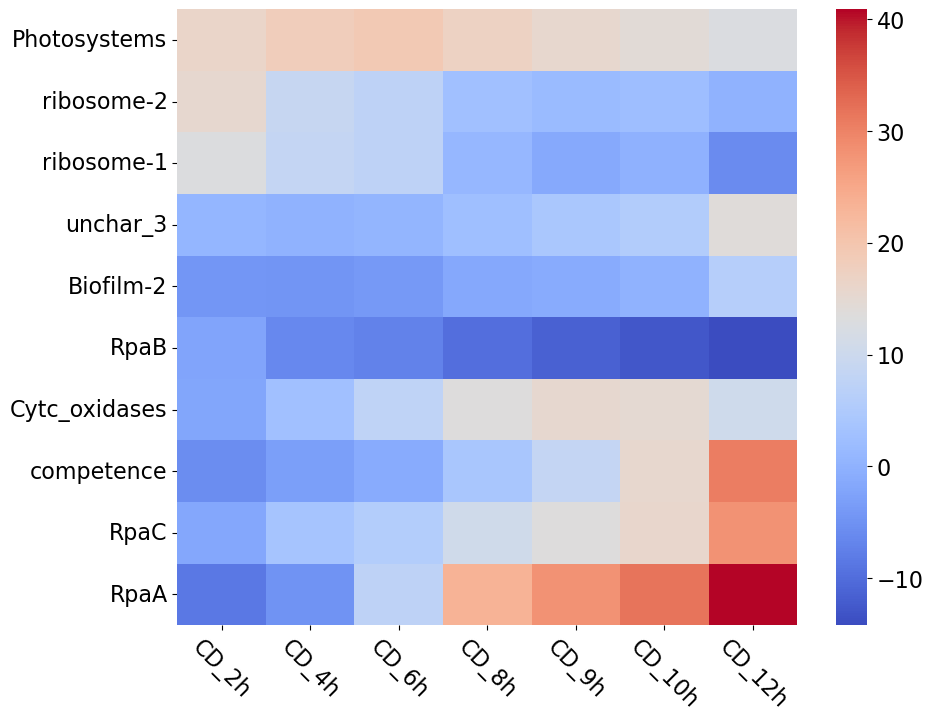

In [740]:
plt.figure(figsize=(10,8))
sns.heatmap(CD_activity(ica_data,['Photosystems','ribosome-2','ribosome-1','unchar_3','Biofilm-2',"RpaB",
                                      'Cytc_oxidases',
                                      'competence','RpaC','RpaA']),cmap='coolwarm')

plt.xticks(rotation=-45)
None
# plt.savefig('../data/Figures/F5a.pdf',bbox_inches='tight',transparent=True)

## Figure 5b

In [741]:
def dark(ica_data,imod_list):
    A = ica_data.A
    _15 = ['SRX3176782','SRX3176800']
    _30 = ['SRX3176783','SRX3176801']
    _60 = ['SRX3176784','SRX3176802']
    _120 = ['SRX3176785','SRX3176803']
    _240 = ['SRX3176786','SRX3176804']
    _480 = ['SRX3176787','SRX3176805']
    _720 = ['SRX3176788','SRX3176806']
    
    
    activity_array = []
    for imod in imod_list:
        result = []
        lists = [_15, _30, _60, _120, _240, _480, _720]
        for sublist in lists:
            avg = (A.loc[imod][sublist[0]] + A.loc[imod][sublist[1]]) / 2
            result.append(avg)

        activity_array.append(result)
    col_index = ["15 min", "30 min", "60 min", "120 min", "240 min", "480 min", "720 min"]

    activity_df = pd.DataFrame(activity_array,index=imod_list,columns = col_index)
    return activity_df

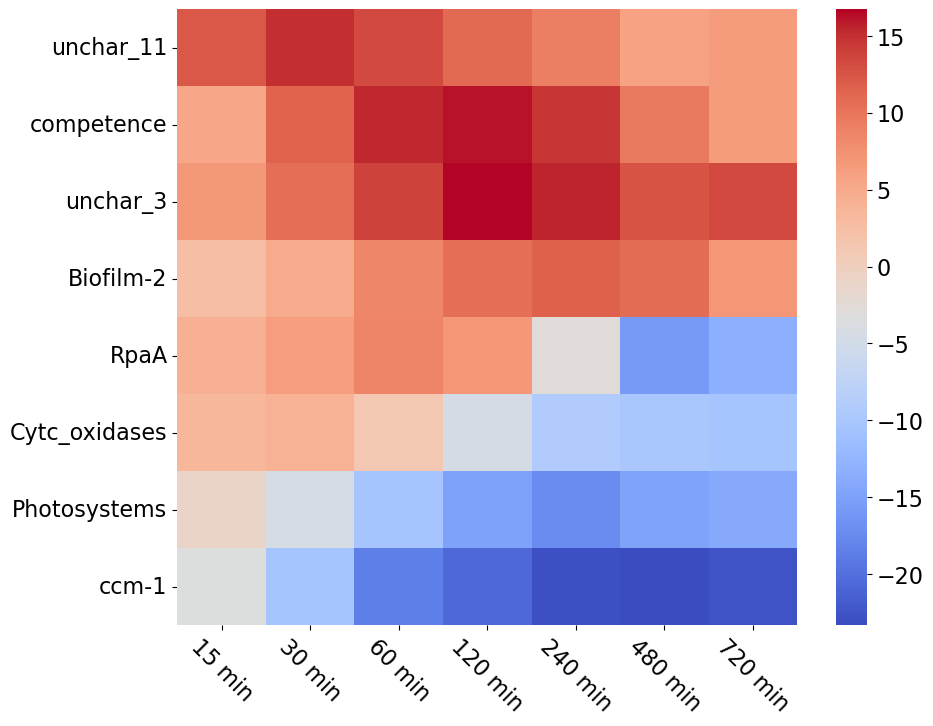

In [742]:
plt.figure(figsize=(10,8))
sns.heatmap(dark(ica_data,['unchar_11','competence','unchar_3','Biofilm-2','RpaA','Cytc_oxidases',
                           'Photosystems','ccm-1']),cmap='coolwarm')

plt.xticks(rotation=-45)
None
# plt.savefig('../data/Figures/F5b.pdf',bbox_inches='tight',transparent=True)

## Figure 5c

In [743]:
def shade_pulse(ica_data,imod_list):
    A = ica_data.A
    ctrl = ['SRX3211336','SRX3211337']
    sp_15 = ['SRX3211349','SRX3211350']
    sp_30 = ['SRX3211351','SRX3211352']
    sp_60 = ['SRX3211353','SRX3211354']
    sp_cd_15 = ['SRX3211355','SRX3211356']
    sp_cd_30 = ['SRX3211357','SRX3211358']
    sp_cd_60 = ['SRX3211359','SRX3211360']
    
    
    activity_array = []
    for imod in imod_list:
        result = []
        lists = [ctrl,sp_15,sp_30,sp_60,sp_cd_15,sp_cd_30,sp_cd_60]
        for sublist in lists:
            avg = (A.loc[imod][sublist[0]] + A.loc[imod][sublist[1]]) / 2
            result.append(avg)

        activity_array.append(result)
    activity_df = pd.DataFrame(activity_array,index=imod_list,columns = ['CD_8h','SP_15','SP_30','SP_60',
                                                                         'SP_CD_15','SP_CD_30','CD_10h',
                                                                         ])
    return activity_df

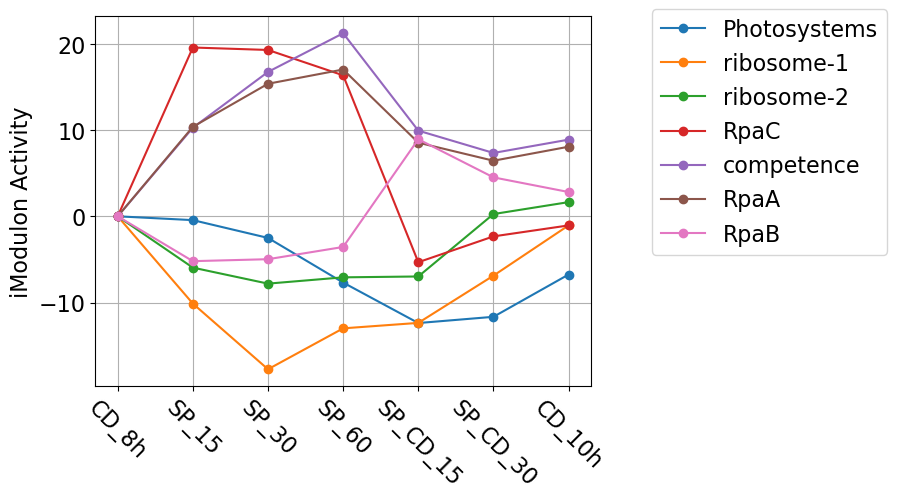

In [746]:
plt.figure()
plt.plot(shade_pulse(ica_data,['Photosystems','ribosome-1','ribosome-2','RpaC','competence','RpaA','RpaB']).T,'-o')
plt.xticks(rotation=-45)
plt.ylabel('iModulon Activity')
plt.legend(['Photosystems','ribosome-1','ribosome-2','RpaC','competence','RpaA','RpaB'],bbox_to_anchor=(1.1, 1.05))
plt.grid(True)
# plt.savefig('../data/Figures/F5c.pdf',bbox_inches='tight',transparent=True)

## Figure 5d

In [ ]:
def high_light(ica_data,imod_list):
    A = ica_data.A
    ctrl = ['SRX3211347','SRX3211348']
    hp_15 = ['SRX3211338','SRX3211339']
    hp_30 = ['SRX3211340','SRX3211341']
    hp_60 = ['SRX3211301','SRX3211342']
    hp_ll_15 = ['SRX3211302','SRX3211303']
    hp_ll_30 = ['SRX3211343','SRX3211344']
    hp_ll_60 = ['SRX3211345','SRX3211346']
    
    activity_array = []
    for imod in imod_list:
        result = []
        lists = [ctrl,hp_15,hp_30,hp_60,hp_ll_15,hp_ll_30,hp_ll_60]
        for sublist in lists:
            avg = (A.loc[imod][sublist[0]] + A.loc[imod][sublist[1]]) / 2
            result.append(avg)

        activity_array.append(result)
    activity_df = pd.DataFrame(activity_array,index=imod_list,columns = ['LL_8h','HP_15','HP_30','HP_60',
                                                                         'HP_LL_15','HP_LL_30','LL_10h'])
    return activity_df

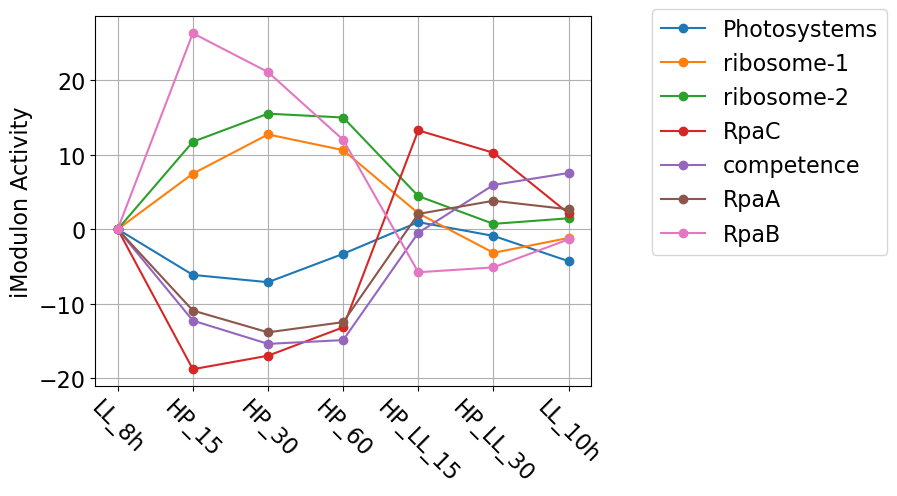

In [748]:
plt.figure()
plt.plot(high_light(ica_data,['Photosystems','ribosome-1','ribosome-2','RpaC','competence','RpaA','RpaB']).T,'-o')
plt.xticks(rotation=-45)
plt.ylabel('iModulon Activity')
plt.legend(['Photosystems','ribosome-1','ribosome-2','RpaC','competence','RpaA','RpaB'],bbox_to_anchor=(1.1, 1.05))
plt.grid(True)
# plt.savefig('../data/Figures/F5d.pdf',bbox_inches='tight',transparent=True)

# Supplements

<AxesSubplot:xlabel='Gene Start', ylabel='NtcA-1 Gene Weight'>

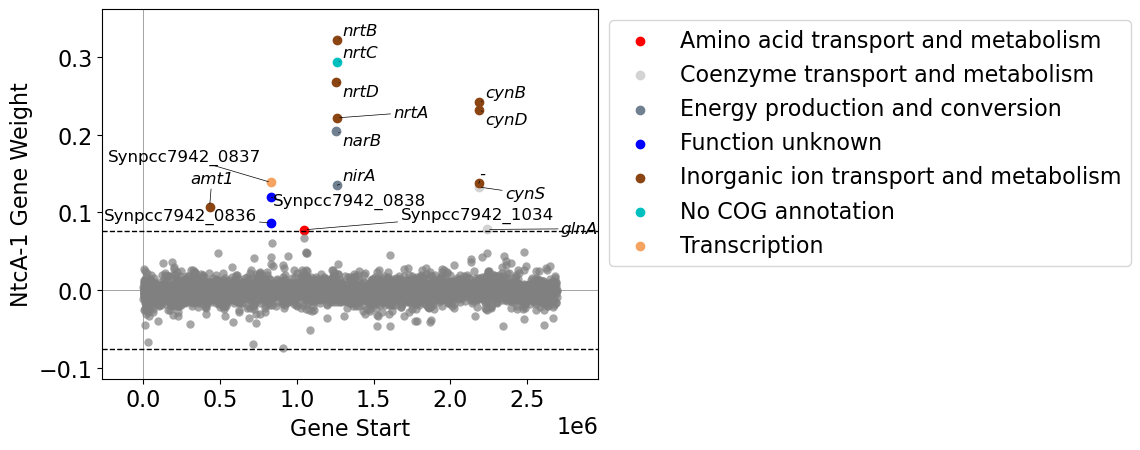

In [749]:
plot_gene_weights(ica_data,'NtcA-1',show_labels=True)

<AxesSubplot:xlabel='Gene Start', ylabel='NtcA-2 Gene Weight'>

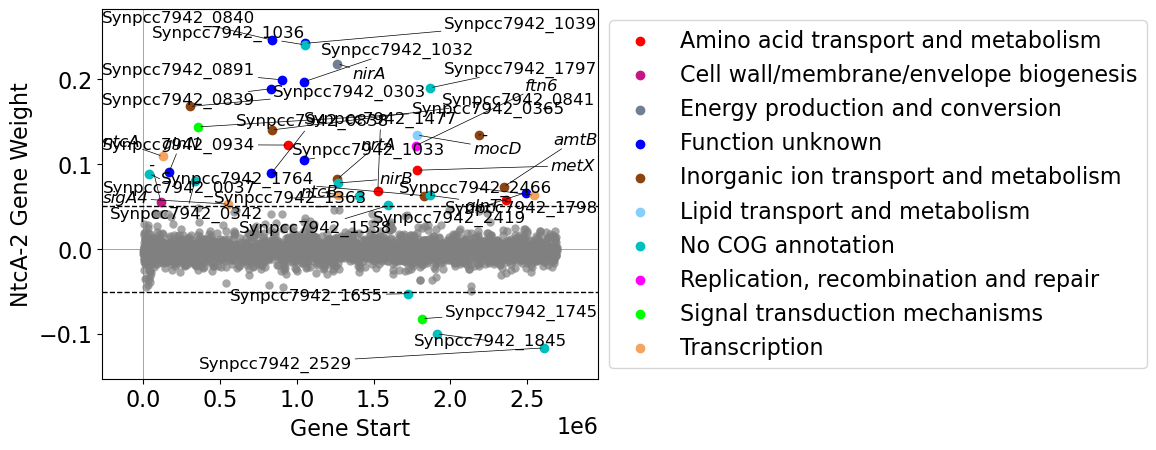

In [750]:
plot_gene_weights(ica_data,'NtcA-2',show_labels=True)

<AxesSubplot:xlabel='NtcA-1 Gene Weight', ylabel='NtcA-2 Gene Weight'>

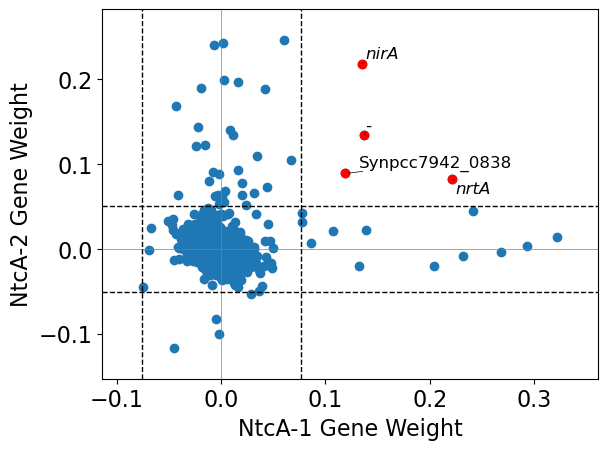

In [752]:
compare_gene_weights(ica_data,'NtcA-1','NtcA-2')

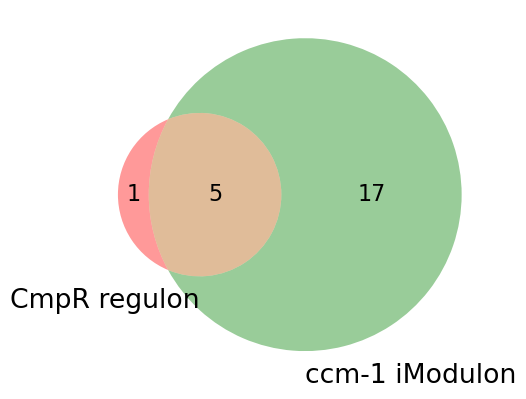

In [756]:
ccmr = set(ica_data.trn[ica_data.trn.regulator=='ccmR'].gene_id)

venn2([ccmr,set(ica_data.view_imodulon('ccm-1').index)],set_labels=('CmpR regulon','ccm-1 iModulon'))

<AxesSubplot:ylabel='PSII iModulon\nActivity'>

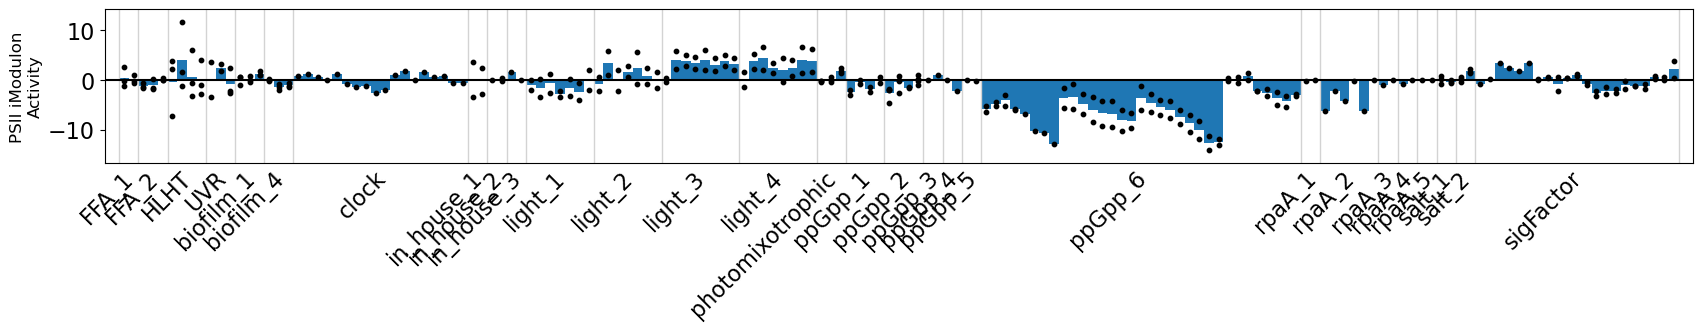

In [757]:
plot_activities(ica_data,'PSII')

<AxesSubplot:ylabel='Photosystems iModulon\nActivity'>

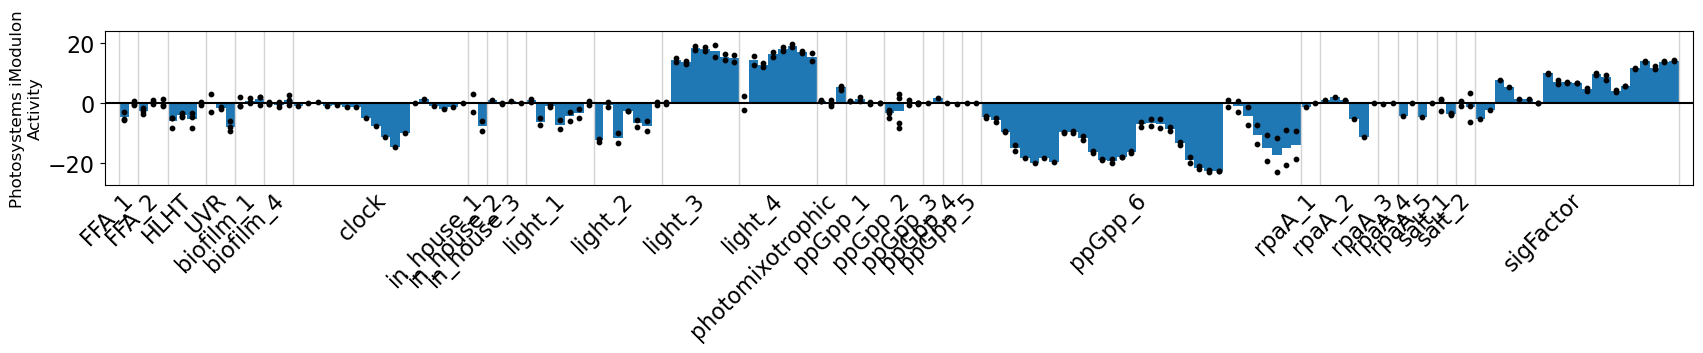

In [758]:
plot_activities(ica_data,'Photosystems')

<AxesSubplot:ylabel='ccm-1 iModulon\nActivity'>

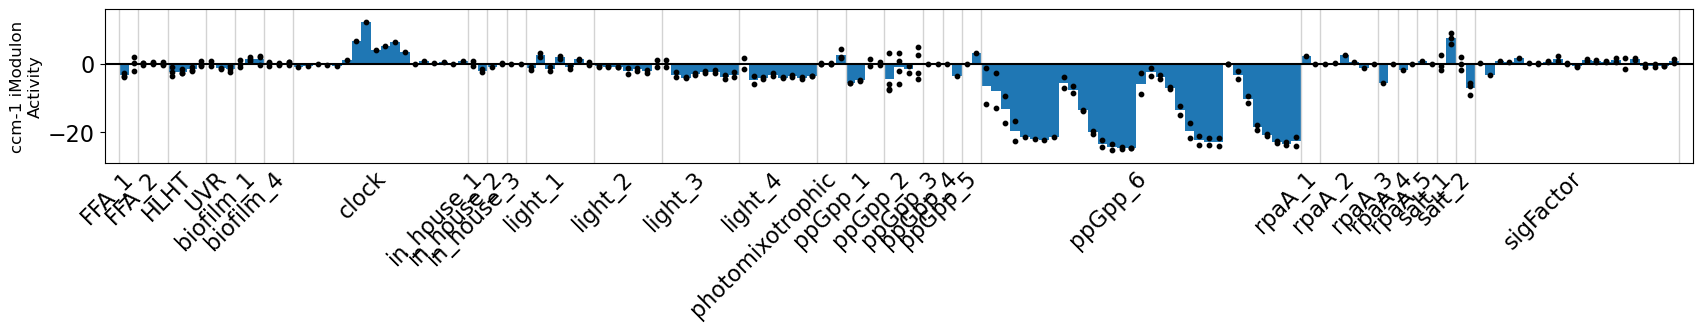

In [759]:
plot_activities(ica_data,'ccm-1')

<AxesSubplot:ylabel='ccm-2 iModulon\nActivity'>

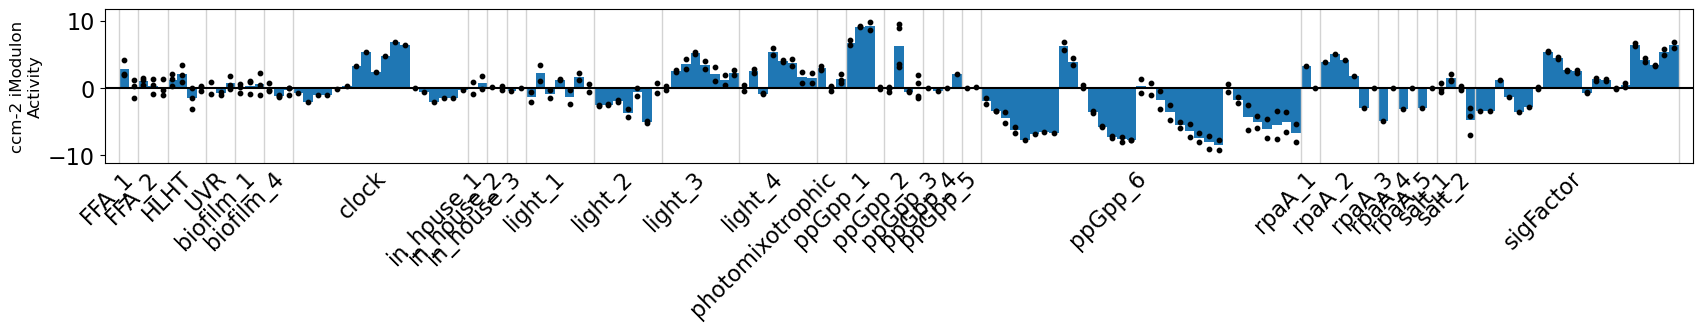

In [760]:
plot_activities(ica_data,'ccm-2')

<AxesSubplot:xlabel='RpaB iModulon Activity', ylabel='Photosystems iModulon Activity'>

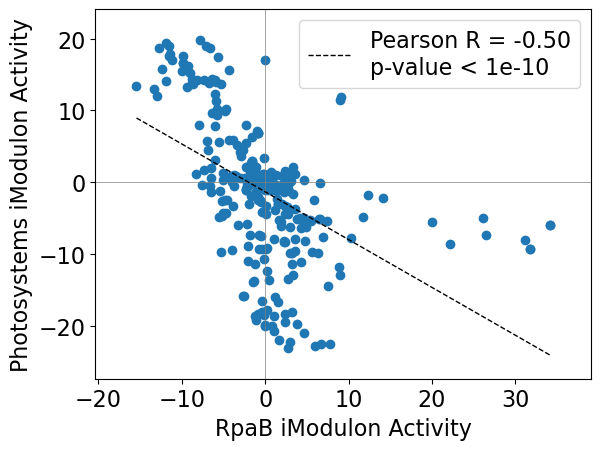

In [761]:
compare_activities(ica_data,'RpaB','Photosystems')

<AxesSubplot:xlabel='Biofilm-2 iModulon Activity', ylabel='competence iModulon Activity'>

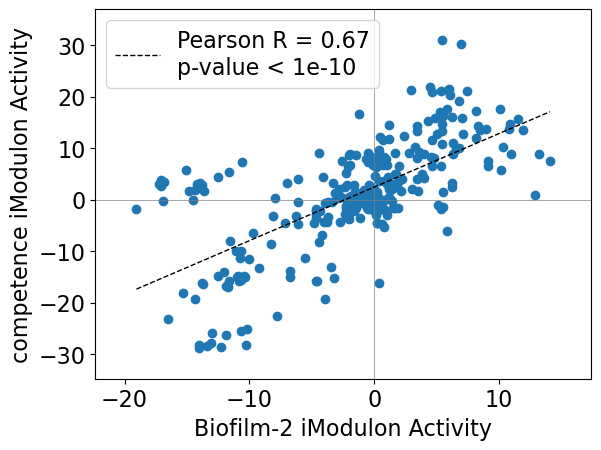

In [762]:
compare_activities(ica_data,'Biofilm-2','competence')

<AxesSubplot:xlabel='Biofilm-2 iModulon Activity', ylabel='phototaxis iModulon Activity'>

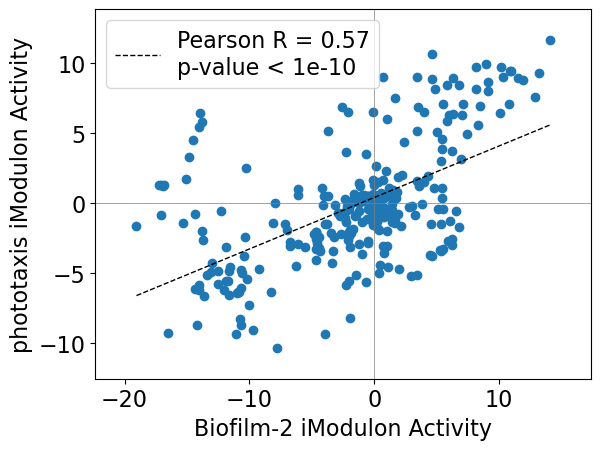

In [763]:
compare_activities(ica_data,'Biofilm-2','phototaxis')

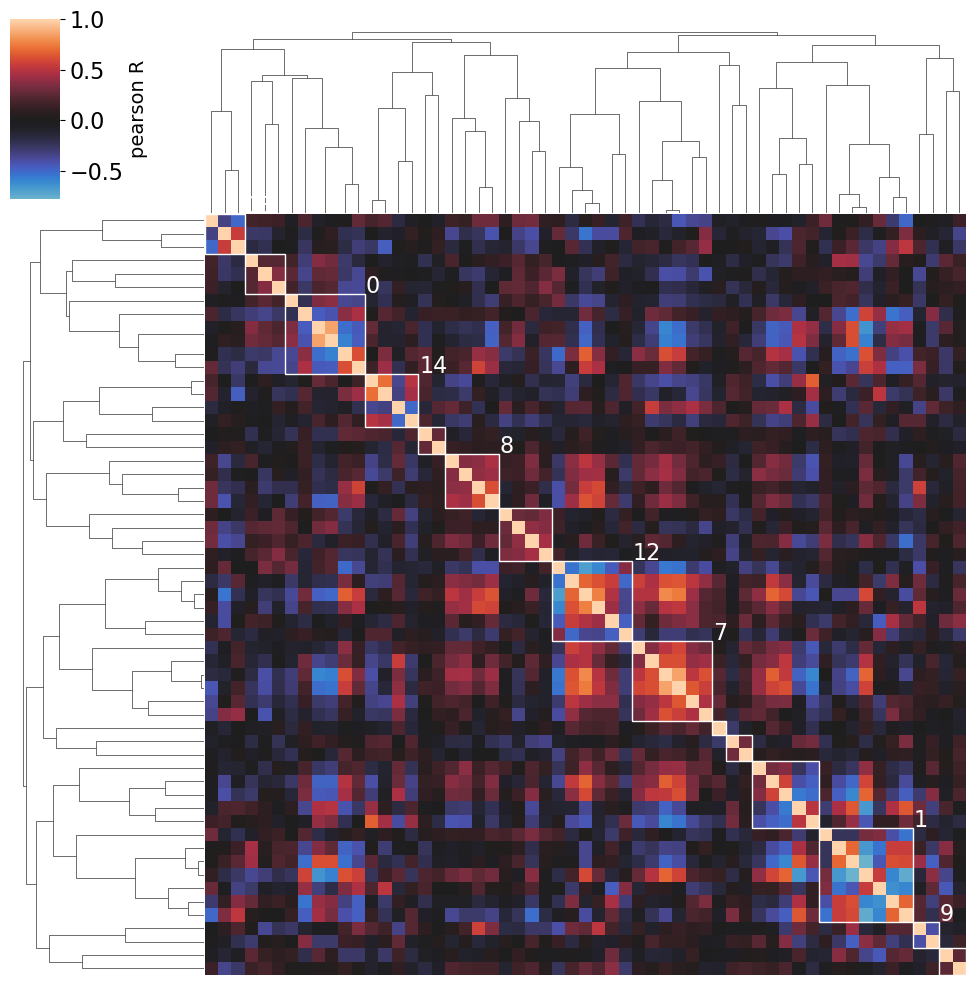

[AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                         distance_threshold=0.8, linkage='complete',
                         n_clusters=None)]

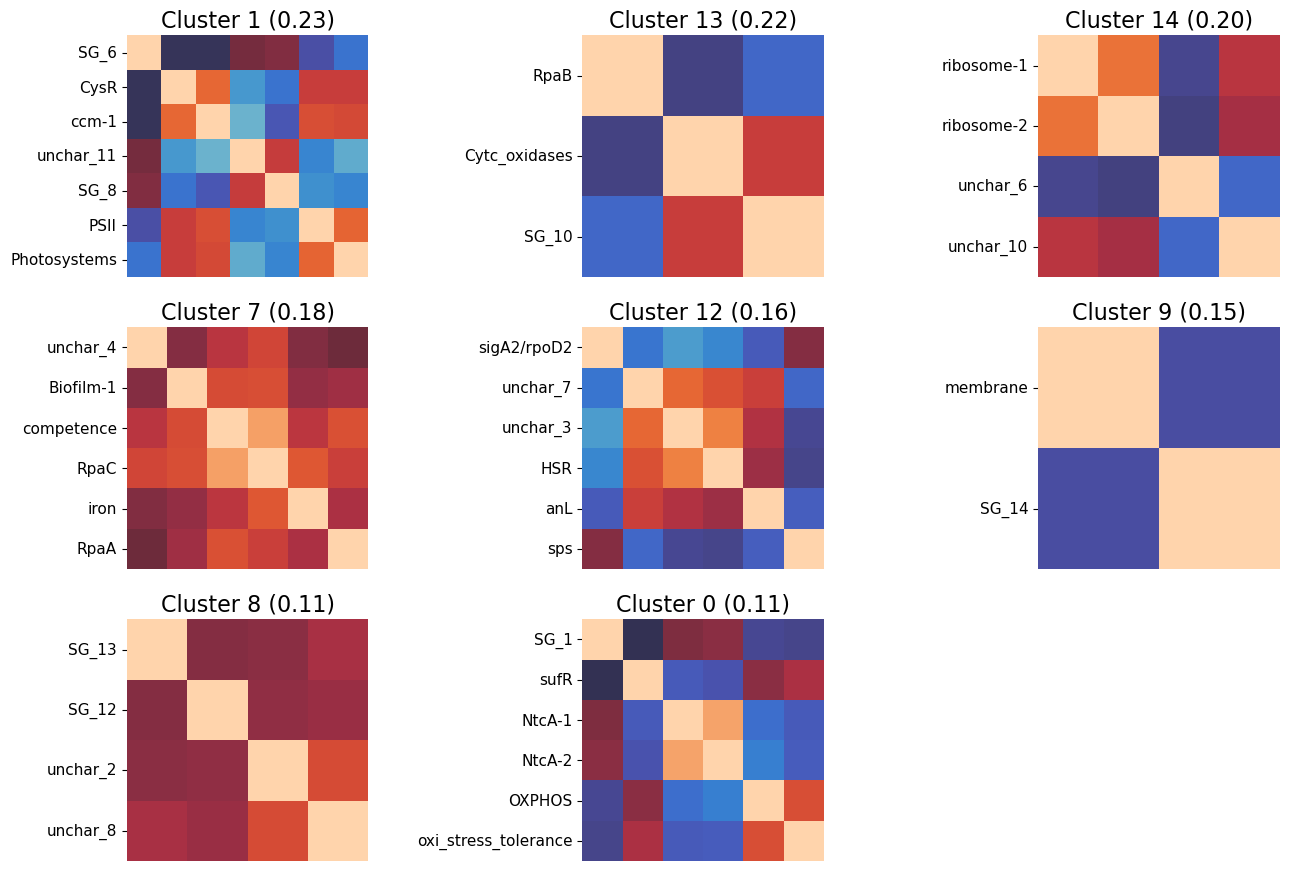

In [764]:
cluster_activities(ica_data,
                   distance_threshold=0.8,
                   show_best_clusters=True,
                   correlation_method = 'pearson')

# OTHERS

In [154]:
de_biofilm = pd.read_excel('/home/annie/Downloads/Data_Sheet_2.XLSX',sheet_name='6) DEG Summary',
                           header=7)

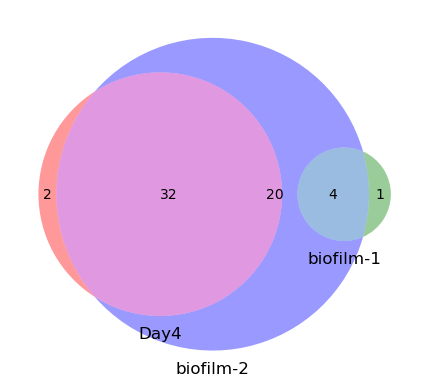

In [156]:
venn3([set(de_biofilm[de_biofilm[de_biofilm.columns[16]] == 'Down'].ORF),
       set(ica_data.view_imodulon('Biofilm-1').index),
       set(ica_data.view_imodulon('Biofilm-2').index)],
       set_labels=['Day4','biofilm-1','biofilm-2'])
plt.savefig('../data/Figures/biofilm_venn.pdf',bbox_inches='tight',transparent=True)

In [157]:
de = pd.read_excel('/home/annie/Downloads/pnas.2211789119.sd01.xlsx',index_col=0)
de_15m = de[(de['log2FoldChange_15m'] > 2) | (de['log2FoldChange_15m'] < -2) & (de['padj_15m'] < 0.05)]

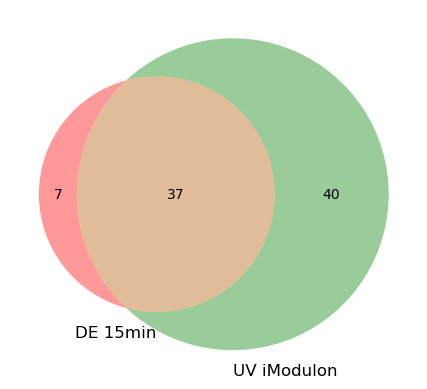

In [158]:
venn2([set(de_15m.index),set(ica_data.view_imodulon('UV').index)],set_labels=('DE 15min','UV iModulon'))
plt.savefig('../data/Figures/uv_venn.pdf',bbox_inches='tight',transparent=True)

In [243]:
set(ica_data.trn[ica_data.trn.regulator=='ntcA'].gene_id).intersection(ica_data.view_imodulon('NtcA-2').index)

{'Synpcc7942_0127',
 'Synpcc7942_1239',
 'Synpcc7942_1240',
 'Synpcc7942_1241',
 'Synpcc7942_1242',
 'Synpcc7942_1845',
 'Synpcc7942_2107'}

<AxesSubplot:xlabel='NtcA-2 iModulon Activity', ylabel='ccm-2 iModulon Activity'>

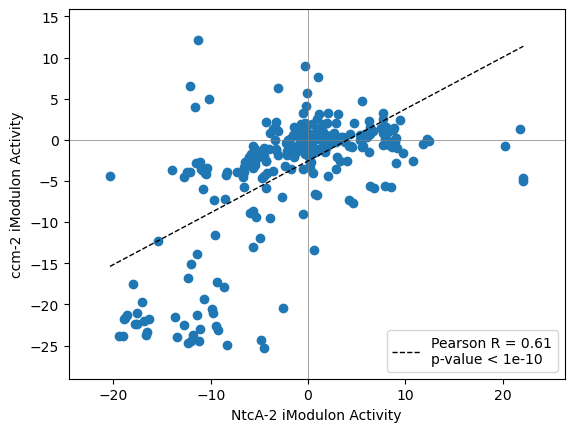

In [263]:
compare_activities(ica_data,'NtcA-2','ccm-2')

<AxesSubplot:xlabel='RpaB iModulon Activity', ylabel='RpaA iModulon Activity'>

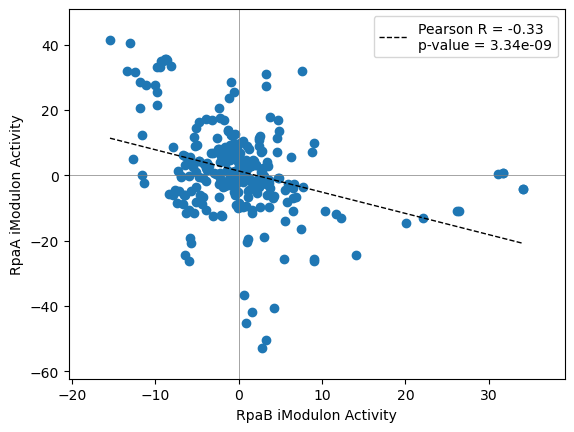

In [428]:
compare_activities(ica_data,'RpaB','RpaA')

In [499]:
syn = pd.read_excel('/home/annie/Downloads/mmc4.xlsx',skiprows=1)

In [500]:
syn.columns

Index(['Regulon of high probability', 'location', 'TU_ID', 'alternative TSS',
       'potential regulated TU', 'coding TU', 'genes', 'ncRNA', 'asRNA',
       'Log2(HL/Median)', 'motif_start (from TSS) [nt]',
       'motif_end (from TSS) [nt]', 'motif_location [nt]',
       'relativeScore_best', 'relativeScore_all', 'motif_strand',
       'motif_sequence', 'proposed regulation_best',
       'proposed regulation_total',
       'HLR1 combined rank (relative expression + relative score)',
       'probability ', 'cluster_ID (best only; manually edited = grey)',
       'Cluster', 'locustags', 'genenames',
       'functional categories (cyanobase)', 'annotations_cyanobase',
       'annotations_mbgd', 'relative score', 'probability', 'cluster',
       'cluster*', 'reported target (Synechocystis 6803)',
       'reported target (other species)', 'in-detail analysis'],
      dtype='object')

In [501]:
# Assuming your DataFrame is named 'syn' and the relevant columns are 'col1', 'col2', 'col3', and 'col4'
# syn = syn[(syn['relative score'] == 'yes') & (syn['probability'] == 'yes') & ((syn['cluster'] == 'yes') | (syn['cluster*'] == 'yes'))]
syn = syn[syn['Regulon of high probability'] == 'yes']

In [503]:
# syn.locustags.astype(str).values.flatten().tolist()

# Assuming your list is named 'my_list'
locus_list = []
for item in syn.locustags.astype(str).values.flatten().tolist():
    if ',' in item:
        # Split the string on commas and extend the locus_list
        locus_list.extend(item.split(', '))
    else:
        # Add the original item to the locus_list
        locus_list.append(item)

In [504]:
# Assuming your list is named 'my_list'
gene_list = []
for item in syn.genenames.astype(str).values.flatten().tolist():
    if ',' in item:
        # Split the string on commas and extend the gene_list
        gene_list.extend(item.split(', '))
    else:
        # Add the original item to the gene_list
        gene_list.append(item)

In [508]:
syn_list = np.unique(locus_list+gene_list)

In [515]:
bbh = pd.read_csv('/home/annie/Documents/syc_prot_vs_selon_prot_parsed.csv',index_col=0)
bbh = bbh[bbh.PID>=50]
bbh.head()

,gene,subject,PID,alnLength,mismatchCount,gapOpenCount,queryStart,queryEnd,subjectStart,subjectEnd,eVal,bitScore,gene_length,COV,BBH
0,sds,Synpcc7942_2362,69.876,322,97,0,1,322,1,322,8.800000e-163,453.0,323,0.996904,<=>
2,slr0612,Synpcc7942_1514,53.846,169,67,1,1,169,41,198,1.010000e-56,174.0,185,0.913514,<=>
6,sll1214,Synpcc7942_1907,70.670,358,105,0,1,358,1,358,0.000000e+00,554.0,358,1.000000,<=>
12,rfbD,Synpcc7942_1342,62.463,341,109,3,5,328,4,342,7.430000e-155,436.0,362,0.941989,<=>
21,speA,Synpcc7942_1037,63.027,641,226,3,19,659,16,645,0.000000e+00,847.0,659,0.972686,<=>


In [516]:
mapping = dict(zip(bbh['subject'], bbh['gene']))

In [505]:
selon = np.unique([mapping[name] for name in locus_list if name in mapping] + [mapping[name] for name in gene_list if name in mapping])

In [517]:
rpab_imod = ica_data.view_imodulon('RpaB').index

<AxesSubplot:ylabel='RpaC iModulon\nActivity'>

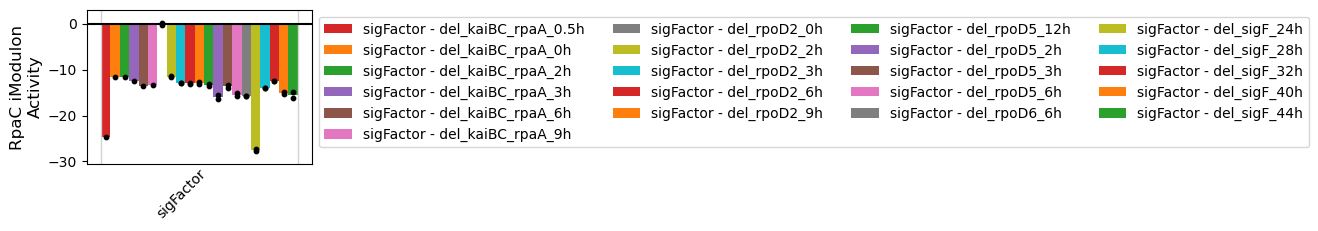

In [636]:
plot_activities(ica_data,'RpaC',projects='sigFactor')

In [634]:
ica_data.view_imodulon('RpaC')

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
Synpcc7942_0096,0.080034,Synpcc7942_0096,CP000100.1,NaN,93764,94285,-,conserved hypothetical protein,Function unknown,Q31S41,Op109,NaN
Synpcc7942_0122,0.065471,Synpcc7942_0122,CP000100.1,NaN,121831,123408,-,EAL,Signal transduction mechanisms,Q31S15,Op129,NaN
Synpcc7942_0193,0.078883,Synpcc7942_0193,CP000100.1,NaN,192247,192471,-,conserved hypothetical protein,No COG annotation,Q31RU4,Op179,NaN
Synpcc7942_0215,0.117702,Synpcc7942_0215,CP000100.1,NaN,217424,217813,-,conserved hypothetical protein,"Replication, recombination and repair",Q31RS2,Op194,NaN
Synpcc7942_0236,0.073112,Synpcc7942_0236,CP000100.1,NaN,232018,232557,+,cyclic nucleotide-binding domain (cNMP-BD) pro...,No COG annotation,Q31RQ1,Op209,NaN
Synpcc7942_0267,0.079543,rsmG,CP000100.1,NaN,263757,264485,+,methyltransferase GidB,"Translation, ribosomal structure and biogenesis",Q31RM0,Op230,NaN
Synpcc7942_0415,0.082752,Synpcc7942_0415,CP000100.1,NaN,405168,406145,-,conserved hypothetical protein,Function unknown,Q31R72,Op335,NaN
Synpcc7942_0433,0.112566,Synpcc7942_0433,CP000100.1,NaN,423632,424840,+,conserved hypothetical protein,No COG annotation,Q8GMQ5,Op348,NaN
Synpcc7942_0708,-0.072814,ubiB1,CP000100.1,NaN,698708,700459,+,conserved hypothetical protein,Function unknown,Q31QC9,Op550,NaN
Synpcc7942_0768,0.068486,Synpcc7942_0768,CP000100.1,NaN,760522,761178,+,conserved hypothetical protein,No COG annotation,Q31Q69,Op589,NaN


In [536]:
rpab_chip = pd.read_excel('/home/annie/Downloads/elife-32032-fig5-data2.xlsx',sheet_name='Replicate 1',skiprows=4)
rpab_chip = rpab_chip[~rpab_chip['Gene target of peak'].isna()]


venn2([set(rpab_chip['Gene target of peak']),set(ica_data.view_imodulon('RpaB').index)],
     set_labels=['ChIP-seq targets','RpaB iModulon'])
plt.savefig('../data/Figures/rpab_chip.pdf',transparent=True)

,RpaB Peak #,Start,End,Peak max location,Q-value,8,8.25,9,8.1,8.25.1,...,8.25.3,9.3,Gene target of peak,High confidence class of gene target,8.4,8.25.4,9.4,8.5,8.25.5,9.5
4,5,54874,56127,55234,0.000000e+00,4.167617,3.356500,3.617961,5.040483,6.251204,...,0.310572,0.121883,Synpcc7942_0052,0,0,0.133805,-0.427314,0,0.752386,-0.041993
7,8,90192,90556,90364,0.000000e+00,7.456045,8.188199,8.084246,9.134513,7.474319,...,-0.289386,-0.322576,Synpcc7942_0091,0,0,1.965637,0.644295,0,0.454416,0.042261
8,9,94196,94483,94332,1.377536e-144,2.386691,1.676504,1.733235,2.461696,3.745734,...,0.605596,0.667166,Synpcc7942_0096,Dusk,0,-3.918255,-3.024300,0,2.226438,1.864662
9,10,101019,101311,101114,4.465038e-202,3.608251,1.982232,2.006679,3.025490,3.985237,...,0.397497,0.637951,Synpcc7942_0100,Dusk,0,-3.960017,-2.759362,0,3.079596,4.452884
10,10,101019,101311,101114,4.465038e-202,3.608251,1.982232,2.006679,3.025490,3.985237,...,0.397497,0.637951,Synpcc7942_0101,Dawn,0,0.684045,0.296839,0,-0.629991,-0.164333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,208,2521495,2521955,2521768,5.460981e-210,2.950441,2.730788,2.968964,3.817261,3.561158,...,-0.100191,-0.354688,Synpcc7942_2444,0,0,0.063928,0.294798,0,-0.961866,-0.887204
226,211,2557996,2558354,2558182,0.000000e+00,5.907208,2.905009,2.742379,4.239393,8.934317,...,1.075500,0.757626,Synpcc7942_2476,Dusk,0,-1.309279,-0.635472,0,0.794034,0.968405
227,212,2562681,2563635,2563251,0.000000e+00,5.382434,4.244234,4.561864,4.676983,4.766074,...,0.027223,0.116461,Synpcc7942_2481,0,0,-0.213936,-0.954842,0,-0.602702,0.204248
229,214,2587651,2588183,2588022,3.426928e-318,5.688840,3.660874,3.831255,4.619542,6.467865,...,0.485540,0.612682,Synpcc7942_2507,Dusk,0,-1.193598,-1.268940,0,1.172407,1.683753


In [540]:
dusk_dawn = pd.read_excel('~/Downloads/sd1.xlsx',sheet_name = 'Analysis of Circadian Gene Exp',index_col=0)
dusk_genes = dusk_dawn[dusk_dawn['Non-Circadian 0, Dusk 1, Dawn 2'] == 1]['7942 ID'].dropna()
dawn_genes = dusk_dawn[dusk_dawn['Non-Circadian 0, Dusk 1, Dawn 2'] == 2]['7942 ID'].dropna()

In [647]:
ica_data.sample_table[ica_data.sample_table.project=='biofilm_1'].publication[0]

'35814646'

In [531]:
'Synpcc7942_0501' in ica_data.view_imodulon('RpaB').index

False

<AxesSubplot:ylabel='RpaB iModulon\nActivity'>

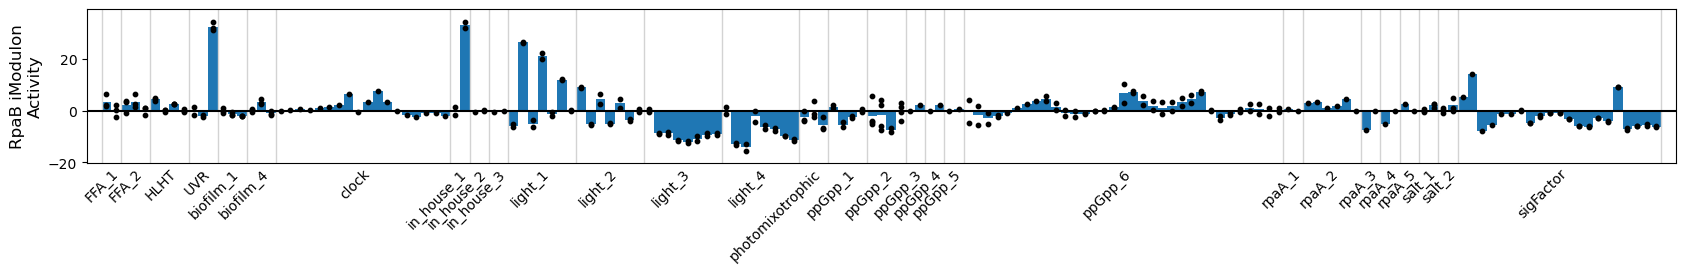

In [548]:
plot_activities(ica_data,'RpaB')

<AxesSubplot:ylabel='RpaB iModulon\nActivity'>

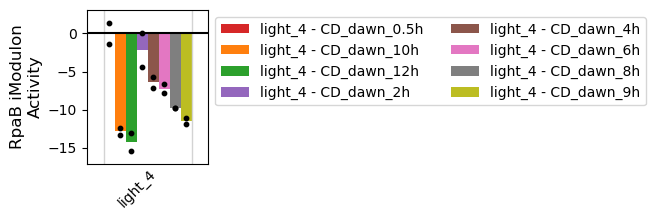

In [620]:
plot_activities(ica_data,'RpaB',projects='light_4')

In [575]:
ica_data.sample_table[['intensity','light_flux_umol/m2/s']]

,intensity,light_flux_umol/m2/s
SRX259777,NaN,60
SRX259778,NaN,60
SRX259779,NaN,60
SRX259783,NaN,60
SRX259784,NaN,60
...,...,...
SRX4105561,NaN,100
SRX4105564,NaN,100
SRX4105565,NaN,100
SRX4105566,NaN,100


In [580]:
d = dict(zip(ica_data.A.loc['RpaB'],ica_data.sample_table['light_flux_umol/m2/s']))

In [602]:
df=pd.DataFrame(ica_data.sample_table['light_flux_umol/m2/s'])
df['Activity'] = ica_data.A.loc['RpaB']

In [609]:
df.reset_index().drop('index',axis=1)

,light_flux_umol/m2/s,Activity
0,60,-2.356413
1,60,2.036026
2,60,0.320387
3,60,1.866564
4,60,6.543257
...,...,...
295,100,-3.352382
296,100,-5.772849
297,100,-6.000291
298,100,-2.905188


In [522]:
syn_list

array(['6803t37', '6803t38 (as)', 'Norf6', 'SyR6', 'SyR9', 'acrD', 'acsF',
       'ahcY', 'apcE (alt TSS)', 'apqZ', 'arsA', 'bcp', 'bicA', 'cas10',
       'cas6-2a', 'cbaB', 'cbiM', 'cbiO2 (as)', 'cbiQ2', 'cbiX', 'cdsA',
       'clpS', 'cpcA', 'cpcB', 'cpcC1', 'cpcC2', 'cpcD (alt TSS)',
       'cpcG1', 'crtQ', 'crtR (alt TSS)', 'csm3', 'csm6 (alt TSS)',
       'csx19', 'cya1', 'cynS', 'desD', 'devA', 'devB', 'devC', 'dgdA',
       'dnaJ', 'dnaK', 'fbaA/fda', 'ffh', 'fhuA', 'fpg', 'ftsH1',
       'ftsH2 (alt TSS)', 'ftsH3', 'fus', 'gcp (as)', 'gcvP', 'glgX',
       'glmU', 'gltX', 'glyQ', 'gpx2', 'grxC', 'gshB', 'gst', 'gyrB',
       'hemH/scpA', 'hhoA', 'hik27 (alt TSS)', 'hik8/sasA (as)',
       'hisG (alt TSS)', 'hliA/scpC', 'hliB/scpD', 'hliC/scpB',
       'hliD/scpE', 'hliR1', 'hypD', 'icfG', 'ileS (as)', 'ilvN', 'ion',
       'isiA', 'isiA (as)', 'kaiA', 'kaiB1', 'kaiB3 (alt TSS)', 'kaiC1',
       'ktrB/ntpJ', 'lexA', 'lysC', 'metK', 'moaA', 'moaC', 'moaD',
       'moaE', 'moeA', 

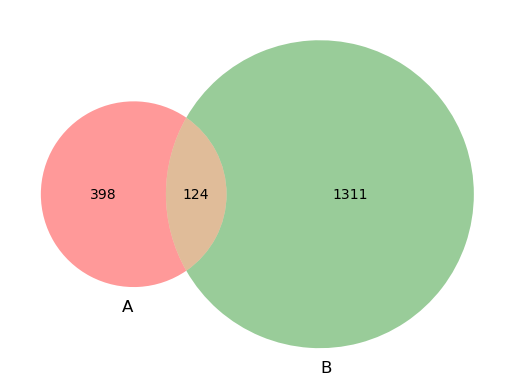

In [511]:
venn2([set(syn_list),set(bbh.gene)])

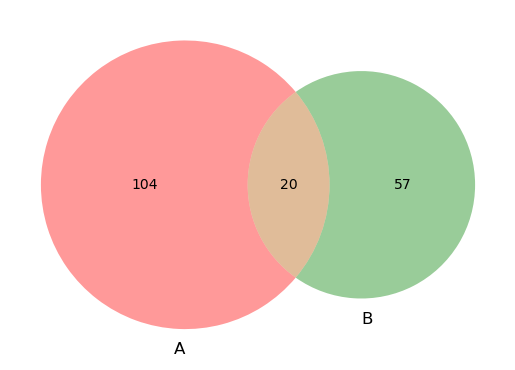

In [507]:
venn2([set(selon),set(ica_data.view_imodulon('RpaB').index)])

<AxesSubplot:xlabel='Cytc_oxidases iModulon Activity', ylabel='RpaC iModulon Activity'>

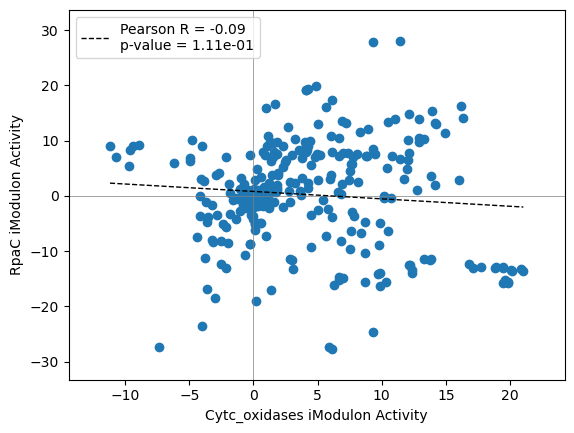

In [441]:
compare_activities(ica_data,'Cytc_oxidases','RpaC')

<AxesSubplot:xlabel='ccm-1 iModulon Activity', ylabel='Photosystems iModulon Activity'>

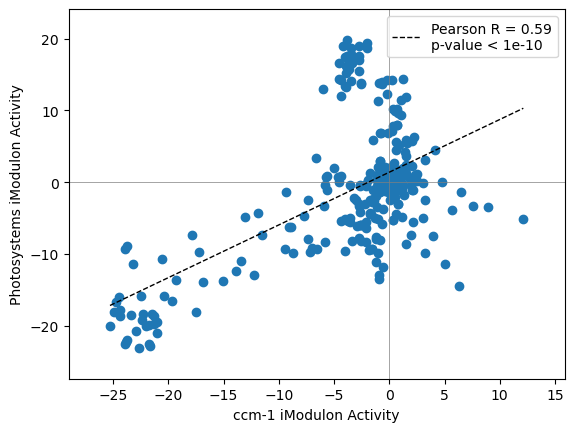

In [301]:
compare_activities(ica_data,'ccm-1','Photosystems')

<AxesSubplot:ylabel='ccm-1 iModulon\nActivity'>

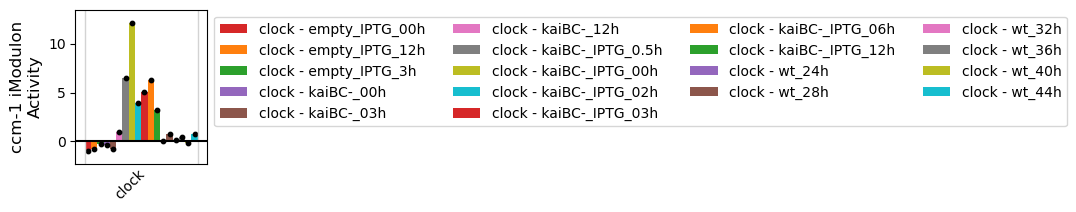

In [302]:
plot_activities(ica_data,'ccm-1',projects='clock')

In [366]:
ica_data.sample_table[ica_data.sample_table.project=='HLHT'].publication[0]

'https://www.nature.com/articles/s41467-023-36964-5'

<AxesSubplot:ylabel='Biofilm-2 iModulon\nActivity'>

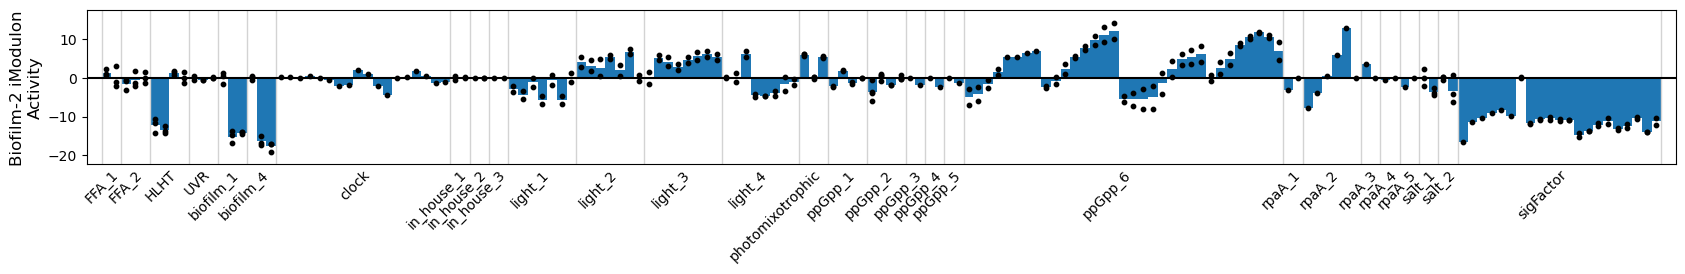

In [368]:
plot_activities(ica_data,'Biofilm-2')

In [386]:
ica_data.view_imodulon('Biofilm-2').sort_values(by='gene_weight',ascending=False)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
Synpcc7942_0049,0.258774,-,CP000100.1,NaN,49550,49984,-,pilin polypeptide PilA-like,"Intracellular trafficking, secretion, and vesi...",Q31S88,Op80,NaN
Synpcc7942_2070,0.206815,pilT1,CP000100.1,NaN,2146366,2147454,-,twitching motility protein,Cell motility,Q31LG9,Op1558,NaN
Synpcc7942_1890,0.201919,Synpcc7942_1890,CP000100.1,NaN,1963748,1964254,+,conserved hypothetical protein,No COG annotation,Q31LZ9,Op1424,NaN
Synpcc7942_2069,0.180399,pilC,CP000100.1,NaN,2145109,2146341,-,fimbrial assembly protein PilC-like,"Intracellular trafficking, secretion, and vesi...",Q31LH0,Op1558,NaN
Synpcc7942_1821,0.166704,Synpcc7942_1821,CP000100.1,NaN,1893904,1894263,+,conserved hypothetical protein,No COG annotation,Q8GJL3,Op1376,NaN
Synpcc7942_2483,0.161619,Synpcc7942_2483,CP000100.1,NaN,2563680,2565164,-,conserved hypothetical protein,No COG annotation,Q31KA6,Op1862,NaN
Synpcc7942_2482,0.146825,Synpcc7942_2482,CP000100.1,NaN,2563111,2563704,-,hypothetical protein,No COG annotation,Q8GIS8,Op1861,NaN
Synpcc7942_0048,0.143679,-,CP000100.1,NaN,48927,49361,-,pilin polypeptide PilA-like,"Intracellular trafficking, secretion, and vesi...",Q31S89,Op79,NaN
Synpcc7942_0046,0.137374,Synpcc7942_0046,CP000100.1,NaN,45164,46507,+,Methylase involved in ubiquinone/menaquinone b...,"Secondary metabolites biosynthesis, transport,...",Q31S91,Op77,NaN
Synpcc7942_1839,0.134953,Synpcc7942_1839,CP000100.1,NaN,1906094,1906834,-,conserved hypothetical protein,Function unknown,Q31M50,Op1389,NaN


<AxesSubplot:xlabel='Gene Start', ylabel='Biofilm-1 Gene Weight'>

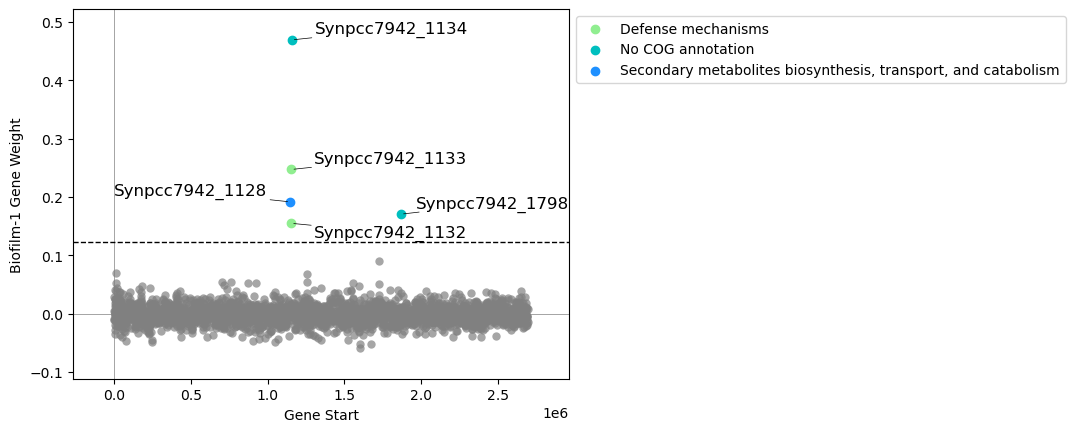

In [346]:
plot_gene_weights(ica_data,'Biofilm-1',show_labels=True)

<AxesSubplot:xlabel='Gene Start', ylabel='Biofilm-2 Gene Weight'>

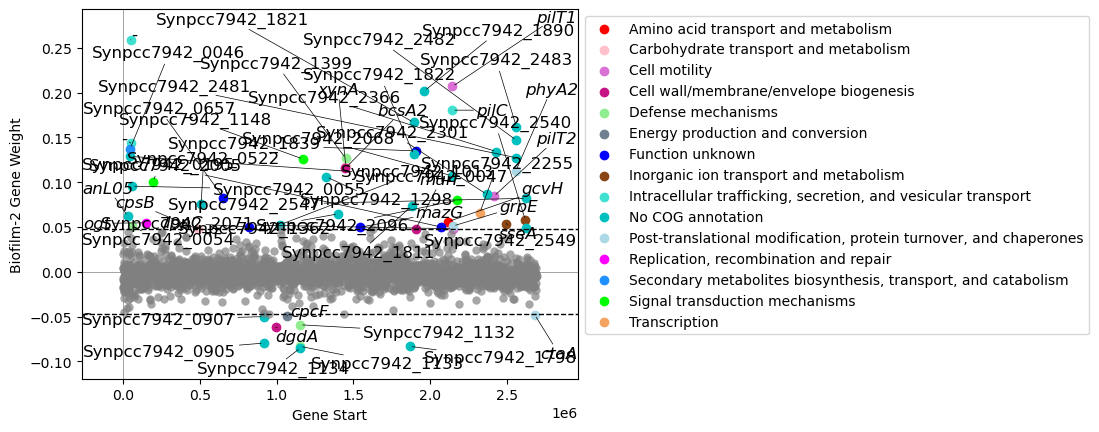

In [340]:
plot_gene_weights(ica_data,'Biofilm-2',show_labels=True)

<AxesSubplot:xlabel='Biofilm-1 Gene Weight', ylabel='Biofilm-2 Gene Weight'>

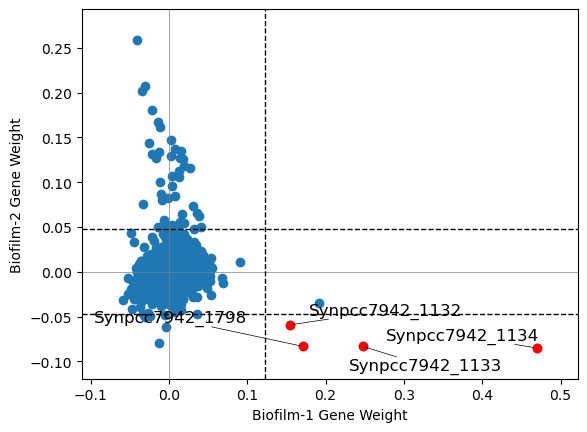

In [339]:
compare_gene_weights(ica_data,'Biofilm-1','Biofilm-2')

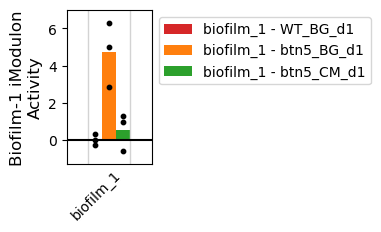

In [348]:
plot_activities(ica_data,'Biofilm-1',projects=['biofilm_1'])
plt.savefig('../data/Figures/biofilm1_day1.pdf',transparent=True)

<AxesSubplot:ylabel='Biofilm-1 iModulon\nActivity'>

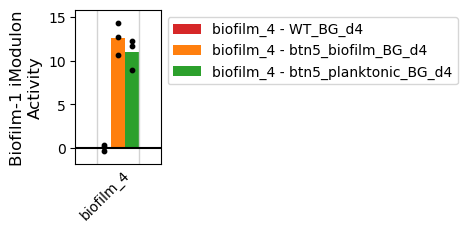

In [359]:
plot_activities(ica_data,'Biofilm-1',projects=['biofilm_4'])

<AxesSubplot:ylabel='Biofilm-2 iModulon\nActivity'>

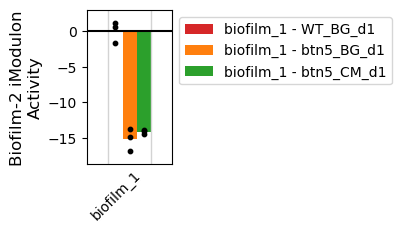

In [371]:
plot_activities(ica_data,'Biofilm-2',projects=['biofilm_1'])

<AxesSubplot:ylabel='Biofilm-2 iModulon\nActivity'>

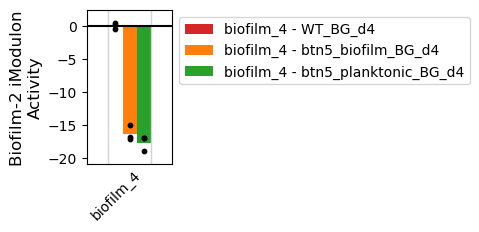

In [372]:
plot_activities(ica_data,'Biofilm-2',projects=['biofilm_4'])

<AxesSubplot:xlabel='Biofilm-2 iModulon Activity', ylabel='phototaxis iModulon Activity'>

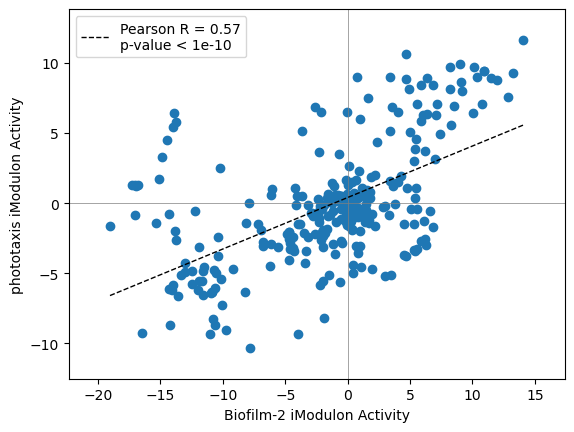

In [358]:
compare_activities(ica_data,'Biofilm-2','phototaxis')

<AxesSubplot:xlabel='Biofilm-2 iModulon Activity', ylabel='competence iModulon Activity'>

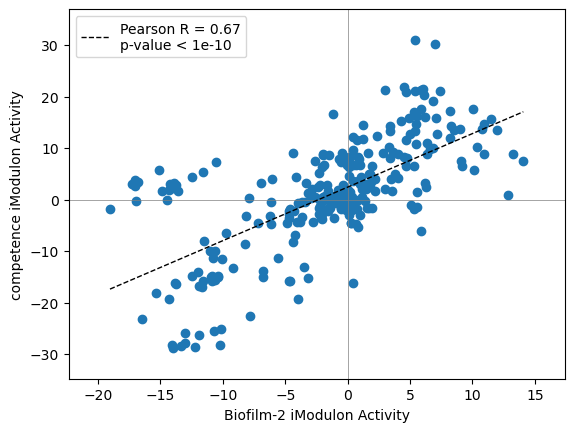

In [356]:
compare_activities(ica_data,'Biofilm-2','competence')

In [564]:
pd.read_csv('/home/annie/Documents/selon/data/processed_data/metadata.tsv',sep='\t',index_col=0)

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,OD,fluorescent light,intensity,light_flux_umol/m2/s,skip,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_replicate_correlations
Experiment,,,,,,,,,,,,,,,,,,,,,
SRX10864008,SRR14518535,2022-03-07 02:10:01,2021-05-15 02:11:09,20663676.0,1.033184e+09,0.0,50.0,609.0,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,0.2,continuous illumination of 2000 to 3000 lx,NaN,NaN,NaN,True,True,True,photomixotrophic:photoautotroph,True
SRX10864009,SRR14518534,2022-03-07 02:10:01,2021-05-15 02:11:33,24072858.0,1.203643e+09,0.0,50.0,710.0,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,0.2,continuous illumination of 2000 to 3000 lx,NaN,NaN,NaN,True,True,True,photomixotrophic:photoautotroph,True
SRX10864010,SRR14518533,2022-03-07 02:10:01,2021-05-15 02:10:52,22938584.0,1.146929e+09,0.0,50.0,680.0,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,0.2,continuous illumination of 2000 to 3000 lx,NaN,NaN,NaN,True,True,True,photomixotrophic:photoautotroph,True
SRX10864011,SRR14518532,2022-03-07 02:10:01,2021-05-15 02:11:21,24106384.0,1.205319e+09,0.0,50.0,707.0,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,0.2,continuous illumination of 2000 to 3000 lx,NaN,NaN,NaN,True,True,True,photomixotrophic:glucose,True
SRX10864012,SRR14518531,2022-03-07 02:10:01,2021-05-15 02:11:47,24090970.0,1.204548e+09,0.0,50.0,717.0,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,0.2,continuous illumination of 2000 to 3000 lx,NaN,NaN,NaN,True,True,True,photomixotrophic:glucose,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
km_LL_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,True,True,in_house_2:km_LL,True
post_uv_2hrs_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,True,True,in_house_3:post_uv_2hrs,True
post_uv_control_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,True,True,in_house_3:post_uv_control,True


In [567]:
ica_data.sample_table = pd.read_csv('/home/annie/Documents/selon/data/processed_data/metadata.tsv',sep='\t',index_col=0)

<AxesSubplot:ylabel='Biofilm-1 iModulon\nActivity'>

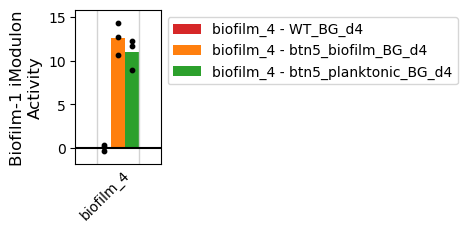

In [354]:
plot_activities(ica_data,'Biofilm-1',projects=['biofilm_4'])

In [765]:
explained_variance(ica_data)

0.6749976516992444